<a href="https://colab.research.google.com/github/MK316/Fall2022/blob/main/Session04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [20]:
data = pd.read_csv("22_grades.csv")

In [21]:
data.head()

,Group,Rid,Midterm,Final
0,G7,1,55.8,67.0
1,G7,2,52.2,70.0
2,G7,3,52.7,66.8
3,G7,4,60.2,80.2
4,G6,5,50.7,58.0


In [22]:
df1 = data[["Group","Midterm","Final"]]
df1.head()

,Group,Midterm,Final
0,G7,55.8,67.0
1,G7,52.2,70.0
2,G7,52.7,66.8
3,G7,60.2,80.2
4,G6,50.7,58.0


## Practice with dataframe

In [14]:
# Creating the dataframe 
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[7, 2, 54, 3, None],
                   "C":[20, 16, 11, 3, 8],
                   "D":[14, 3, None, 2, 6]})
df

,A,B,C,D
0,12.0,7.0,20,14.0
1,4.0,2.0,16,3.0
2,5.0,54.0,11,NaN
3,NaN,3.0,3,2.0
4,1.0,NaN,8,6.0


In [15]:
df.mean()

A     5.50
B    16.50
C    11.60
D     6.25
dtype: float64

In [16]:
df.describe()

,A,B,C,D
count,4.000000,4.00000,5.000000,4.000000
mean,5.500000,16.50000,11.600000,6.250000
std,4.654747,25.09316,6.655825,5.439056
min,1.000000,2.00000,3.000000,2.000000
25%,3.250000,2.75000,8.000000,2.750000
50%,4.500000,5.00000,11.000000,4.500000
75%,6.750000,18.75000,16.000000,8.000000
max,12.000000,54.00000,20.000000,14.000000


In [19]:
data.describe()

,Rid,Grading,Midterm
count,30.000000,30.000000,30.000000
mean,15.500000,15.500000,57.930000
std,8.803408,8.803408,14.984685
min,1.000000,1.000000,18.300000
25%,8.250000,8.250000,51.675000
50%,15.500000,15.500000,57.750000
75%,22.750000,22.750000,67.375000
max,30.000000,30.000000,81.900000


# t.test

Independent two sample t-test

In [25]:
from scipy import stats
import numpy as np

In [26]:
rng = np.random.default_rng()

In [27]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

In [28]:
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.11360698826313485, pvalue=0.9095721963461829)

## Application to our data

In [32]:
#define samples
group1 = df1[df1['Group']=='G1']
group2 = df1[df1['Group']=='G2']

#perform independent two sample t-test
stats.ttest_ind(group1['Midterm'], group2['Midterm'])

Ttest_indResult(statistic=-0.6031165958312262, pvalue=0.568512755072503)

In [34]:
group1 = df1['Midterm']
group2 = df1['Final']

#perform independent two sample t-test
stats.ttest_ind(group1, group2)

Ttest_indResult(statistic=-4.53468447572897, pvalue=2.944087460429472e-05)

Exponential to float

In [44]:
x1= 2.944087460429472*(1/pow(10,5))
x1

2.944087460429472e-05

In [38]:
value=str('6,0865000000e-01')
value2=value.replace(',', '.')
float(value2)

0.60865

In [48]:
num = 2.944087460429472e-05
output = "{:.7f}". format(num)
print(output)

0.0000294


## Boxplot

In [51]:
import scipy.stats as stats
## Creating sample dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

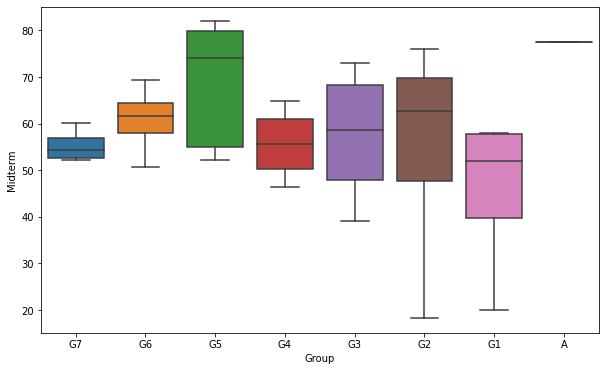

In [53]:
## Boxplot for 'Midterm' by 'Group'
# plt.rcParams['figure.figsize'] = [10, 6]
sns.boxplot(x='Group', y='Midterm', data=df1)
plt.show()

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [56]:
model = ols('Midterm ~ Group', data=df1).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Group,7.0,1693.965,241.995000,1.105065,0.39438
Residual,22.0,4817.718,218.987182,NaN,NaN


[Online reference](https://rfriend.tistory.com/639) ANOVA

# Application to your grading results: 
- data to read, plotting(boxplot, scatter plot), descriptive statstics

[link](https://github.com/MK316/F2022/blob/main/F22_Midterm.ipynb)